<a href="https://colab.research.google.com/github/LarceuM/TelecomXChallenge/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

Se cargara el archivo JSON  en un DataFrame y en la normalizacion de campos se colocara el nombre de campo y en las subagrupaciones se colocara un sep '_' ver ejemplo con colunas custemer_*

In [1]:
import pandas as pd

# Cargar directamente desde el archivo
df = pd.read_json('/content/TelecomX_Data.json')
# Normalizar las columnas anidadas
df = pd.json_normalize(df.to_dict(orient='records'), sep='_')
# Mostrar los primeros registros
#print(df.info())
df.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

se reemplazaran  todos los valores de 'YES' y 'NO'  pro true o false respectivamente, tambien se desplegara df.info() para saber  como quedaron los campos  y una muestra aleatoria de ellos

In [2]:
# conversion a Dato  Boolean
df['Churn'] = df['Churn'].apply(lambda x: x == 'Yes')
df['customer_Partner'] = df['customer_Partner'].apply(lambda x: x == 'Yes')
df['customer_Dependents'] = df['customer_Dependents'].apply(lambda x: x == 'Yes')

df['phone_PhoneService'] = df['phone_PhoneService'].apply(lambda x: x == 'Yes')
df['phone_MultipleLines'] = df['phone_MultipleLines'].apply(lambda x: x == 'Yes')

df['internet_OnlineBackup'] = df['internet_OnlineBackup'].apply(lambda x: x == 'Yes')
df['internet_DeviceProtection'] = df['internet_DeviceProtection'].apply(lambda x: x == 'Yes')
df['internet_TechSupport'] = df['internet_TechSupport'].apply(lambda x: x == 'Yes')
df['internet_StreamingTV'] = df['internet_StreamingTV'].apply(lambda x: x == 'Yes')
df['internet_StreamingMovies'] = df['internet_StreamingMovies'].apply(lambda x: x == 'Yes')

df['account_PaperlessBilling'] = df['account_PaperlessBilling'].apply(lambda x: x == 'Yes')

# conversion a String
df['customerID'] = df['customerID'].astype(str)
df['customer_gender'] = df['customer_gender'].astype(str)
df['internet_InternetService'] = df['internet_InternetService'].astype(str)
df['account_Contract'] = df['account_Contract'].astype(str)
df['account_PaymentMethod'] = df['account_PaymentMethod'].astype(str)

# conversion a float64
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   bool   
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   bool   
 5   customer_Dependents        7267 non-null   bool   
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   bool   
 8   phone_MultipleLines        7267 non-null   bool   
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   bool   
 12  internet_DeviceProtection  7267 non-null   bool   
 13  internet_TechSupport       7267 non-null   bool 

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


#📊 Carga y análisis

> Agregar bloque entrecomillado



se buscaran valores  nulos  y se desplegaran

In [3]:
print(df.isna().sum()[df.isna().sum() > 0])
nan_rows = df[df.isna().any(axis=1)]
nan_rows


account_Charges_Total    11
dtype: int64


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
975,1371-DWPAZ,False,Female,0,True,True,0,False,False,DSL,...,True,True,True,True,False,Two year,False,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,False,Female,0,True,True,0,True,False,No,...,False,False,False,False,False,Two year,False,Mailed check,20.00,NaN
1955,2775-SEFEE,False,Male,0,False,True,0,True,True,DSL,...,True,False,True,False,False,Two year,True,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,False,Male,0,True,True,0,True,False,No,...,False,False,False,False,False,One year,True,Mailed check,19.70,NaN
2232,3115-CZMZD,False,Male,0,False,True,0,True,False,No,...,False,False,False,False,False,Two year,False,Mailed check,20.25,NaN
2308,3213-VVOLG,False,Male,0,True,True,0,True,True,No,...,False,False,False,False,False,Two year,False,Mailed check,25.35,NaN
2930,4075-WKNIU,False,Female,0,True,True,0,True,True,DSL,...,True,True,True,True,False,Two year,False,Mailed check,73.35,NaN
3134,4367-NUYAO,False,Male,0,True,True,0,True,True,No,...,False,False,False,False,False,Two year,False,Mailed check,25.75,NaN
3203,4472-LVYGI,False,Female,0,True,True,0,False,False,DSL,...,False,True,True,True,False,Two year,True,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,False,Female,0,True,True,0,True,False,DSL,...,True,True,False,True,True,Two year,False,Mailed check,80.85,NaN


En los  campos que se encontro registros  nulos   se  asumio  que estan eran cero se realiza el cambio  y se vuelve a iterar para saber si quedan otros valores nulos

In [4]:
df.fillna(0, inplace=True)
df.isna().sum()[df.isna().sum() > 0]

,0


se buscan registros duplicdos

In [5]:
# registros duplicados  ( no existen)
df[df['customerID'].duplicated()]


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total


In [6]:
df['customerID'].sort_values(ascending=True).sample(20)

,customerID
1557,2227-JRSJX
41,0067-DKWBL
2453,3422-GALYP
3342,4647-XXZAM
93,0147-ESWWR
3399,4710-FDUIZ
4009,5482-NUPNA
4865,6652-YFFJO
4846,6630-UJZMY
3961,5414-OFQCB


visializar los valores almacenados en los campos en busca de inconsistencias

In [7]:
print('Churn : ',df['Churn'].unique())
print('customer_Partner : ',df['customer_Partner'].unique())
print('customer_Dependents : ',df['customer_Dependents'].unique())

print('phone_PhoneService : ',df['phone_PhoneService'].unique())
print('phone_MultipleLines : ',df['phone_MultipleLines'].unique())

print('internet_OnlineBackup : ',df['internet_OnlineBackup'].unique())
print('internet_DeviceProtection : ',df['internet_DeviceProtection'].unique())
print('internet_TechSupport : ',df['internet_TechSupport'].unique())
print('internet_StreamingTV : ',df['internet_StreamingTV'].unique())
print('internet_StreamingMovies : ',df['internet_StreamingMovies'].unique())

print('account_PaperlessBilling : ',df['account_PaperlessBilling'].unique())

# conversion a String
print('customer_gender : ',df['customer_gender'].unique())
print('internet_InternetService : ',df['internet_InternetService'].unique())
print('account_Contract : ',df['account_Contract'].unique())
print('account_PaymentMethod : ',df['account_PaymentMethod'].unique())

Churn :  [False  True]
customer_Partner :  [ True False]
customer_Dependents :  [ True False]
phone_PhoneService :  [ True False]
phone_MultipleLines :  [False  True]
internet_OnlineBackup :  [ True False]
internet_DeviceProtection :  [False  True]
internet_TechSupport :  [ True False]
internet_StreamingTV :  [ True False]
internet_StreamingMovies :  [False  True]
account_PaperlessBilling :  [ True False]
customer_gender :  ['Female' 'Male']
internet_InternetService :  ['DSL' 'Fiber optic' 'No']
account_Contract :  ['One year' 'Month-to-month' 'Two year']
account_PaymentMethod :  ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


generacion de campo en el DataFrame df  cuenta diaria a partir del campo csrgos mensuales

In [8]:
df['cuenta_diaria'] = df['account_Charges_Monthly'] /30
df.sample(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,cuenta_diaria
2567,3580-REOAC,True,Male,0,False,False,10,True,False,DSL,...,False,False,False,False,Month-to-month,True,Credit card (automatic),44.85,435.40,1.495000
3251,4537-CIBHB,False,Female,0,True,True,9,True,False,No,...,False,False,False,False,One year,False,Mailed check,20.25,172.35,0.675000
479,0679-IDSTG,True,Female,1,True,True,1,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,69.25,69.25,2.308333
4800,6578-KRMAW,False,Male,0,False,False,32,True,False,Fiber optic,...,True,False,False,True,Month-to-month,True,Credit card (automatic),93.40,2979.30,3.113333
6389,8777-MBMTS,False,Female,1,True,False,65,True,False,Fiber optic,...,True,True,True,True,Two year,True,Credit card (automatic),105.85,6725.50,3.528333


In [9]:
df['Churn'] = df['Churn'].astype(int)

df['customer_Partner'] = df['customer_Partner'].astype(int)
df['customer_Dependents'] = df['customer_Dependents'].astype(int)

df['phone_PhoneService'] = df['phone_PhoneService'].astype(int)
df['phone_MultipleLines'] = df['phone_MultipleLines'].astype(int)

df['internet_OnlineBackup'] = df['internet_OnlineBackup'].astype(int)
df['internet_DeviceProtection'] = df['internet_DeviceProtection'].astype(int)
df['internet_TechSupport'] = df['internet_TechSupport'].astype(int)
df['internet_StreamingTV'] = df['internet_StreamingTV'].astype(int)
df['internet_StreamingMovies'] = df['internet_StreamingMovies'].astype(int)

df['account_PaperlessBilling'] = df['account_PaperlessBilling'].astype(int)

df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,cuenta_diaria
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [10]:
df.describe()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,cuenta_diaria
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333




```
# Esto tiene formato de código
```

#Desarrollo de Graficos  para el analisis de la informacion  de TelecomX

##1.0 Gráfico Distribución de estado clientes

###1.1. Gráfico de Barra: Distribución de estado clientes
Ver la proporción general de clientes que han abandonado el servicio

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [11]:
def plot_churn_distribution():
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Contar los valores de la columna Churn
  churn_counts = df['Churn'].value_counts()

  # Graficar
  churn_counts.plot(kind='bar', color=['#66b3ff', '#ff6666'])
  plt.title('Clientes Activos vs Dado de Baja')
  plt.xlabel('Estado Cliente (0 = Activo, 1 = Baja)')
  plt.ylabel('Número de clientes')
  plt.xticks(ticks=[0, 1], labels=['Activo', 'Baja'], rotation=0)
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  plt.tight_layout()
  return plt

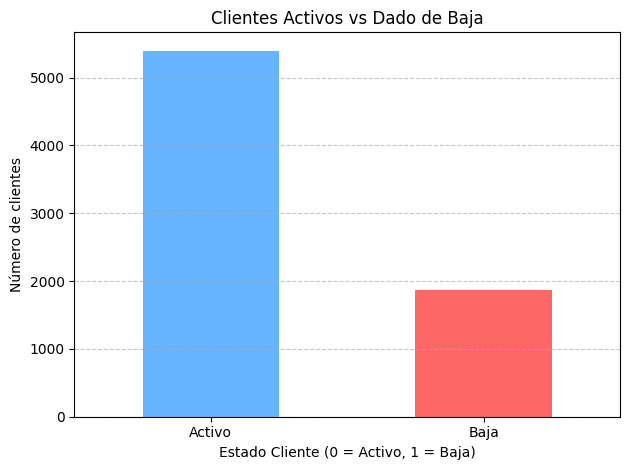

In [12]:
plot_churn_distribution().show()

###1.2. Gráfico de Dona: Distribución de estado clientes
Ver la proporción general de clientes que han abandonado el servicio

In [13]:
def pie_churn_distribution():
  import matplotlib.pyplot as plt

  # 1. Calcular la proporción de clientes con y sin churn
  churn_counts = df['Churn'].value_counts()
  labels = ['Activo', 'Dado de Baja (fuga de Clientes)']
  colors = ['#66b3ff', '#ff6666']  # Puedes usar colores corporativos

  # 2. Crear la figura
  plt.figure(figsize=(8, 6))
  plt.pie(churn_counts,
          labels=labels,
          autopct='%1.1f%%',
          startangle=180,
          colors=colors,
          wedgeprops={'width': 0.4},
          pctdistance=0.8,
          textprops={'fontsize': 12, 'color': 'white'})

  # 3. Estética del fondo (opcional)
  plt.gca().set_facecolor('#F4F4F4')  # Fondo del gráfico
  plt.gcf().set_facecolor('#F4F4F4')  # Fondo de la figura
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
  # 4. Título
  plt.title('Distribución de Clientes\n Activos vs Dados de Baja', fontsize=16, color='#333333')

  # 5. Asegurar forma circular
  plt.axis('equal')
  plt.tight_layout()
  return plt


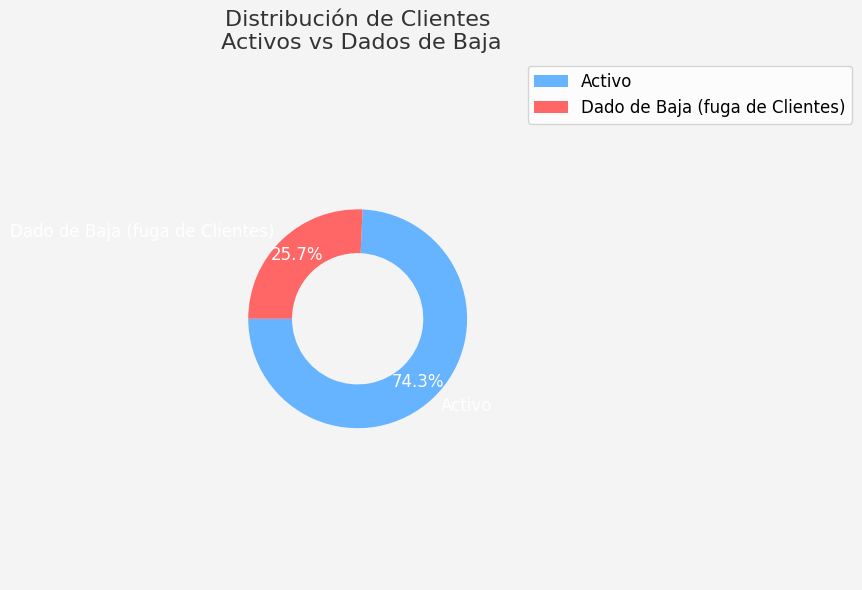

In [14]:
pie_churn_distribution().show()

##2.0  Fuga de Cliente segun tipo de contrato
Comparar el churn según el tipo de contrato (Month-to-month, One year, Two year).

In [15]:
def plot_contrato_estado_cliente():
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  # 1. Crear una tabla de contingencia: conteo de churn por tipo de contrato
  contrato_churn = df.groupby(['account_Contract', 'Churn'], observed=True)['customerID'].count().unstack().fillna(0)

  # 2. Normalizar a proporciones (opcional, para comparar porcentajes)
  contrato_churn_prop = contrato_churn.div(contrato_churn.sum(axis=1), axis=0)

  # 3. Crear el gráfico de barras agrupadas (proporciones por tipo de contrato)
  plt.figure(figsize=(8, 6))

  contrato_churn_prop.plot(kind='bar', stacked=False, color=['#66b3ff', '#ff6666'])

  # 4. Título y etiquetas
  plt.title('Fuga de Cliente por Tipo de Contrato', fontsize=16, color='#333333')
  plt.xlabel('Tipo de Contrato', fontsize=12)
  plt.ylabel('Proporción de Clientes', fontsize=12)
  plt.xticks(rotation=0)
  plt.legend(['Activo', 'Dado de Baja'], title='Estado de Cliente')

  # 5. Estética opcional
  plt.gca().set_facecolor('#F4F4F4')
  plt.gcf().set_facecolor('#F4F4F4')
  sns.despine()
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  # 6. Mostrar el gráfico
  plt.tight_layout()
  return plt

<Figure size 800x600 with 0 Axes>

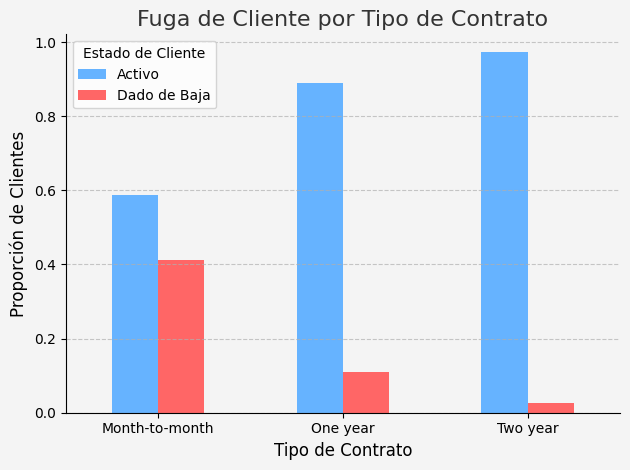

In [16]:
plot_contrato_estado_cliente().show()

#3.0 Fuga de Cliente  por tiempo de permanencia
Tratar de descubrir
   Si van más los nuevos clientes?
   Hay alguna ventana crítica?



In [17]:
def plot_estado_por_tiempo_permanencia():
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns

  # 1. Configurar el gráfico
  plt.figure(figsize=(10, 6))
  plt.gca().set_facecolor('#F4F4F4')  # fondo gráfico
  plt.gcf().set_facecolor('#F4F4F4')  # fondo figura

  # 2. Crear el histograma con hue por churn
  sns.histplot(data=df, x='customer_tenure', hue='Churn', multiple='stack', bins=30,
              palette={False: '#66b3ff', True: '#ff6666'}, edgecolor='white')

  # 3. Estética
  plt.title('Fuga de Clientes (churn) por Tiempo de Permanencia', fontsize=18, color='#444')
  plt.xlabel('Meses como cliente', fontsize=12, color='#1f3b6f')
  plt.ylabel('Número de clientes', fontsize=12, color='#1f3b6f')
  plt.xticks(fontsize=12, color='#1f3b6f')
  plt.yticks(fontsize=12, color='#1f3b6f')
  sns.despine()
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  # 4. Mostrar el gráfico
  plt.tight_layout()
  return plt


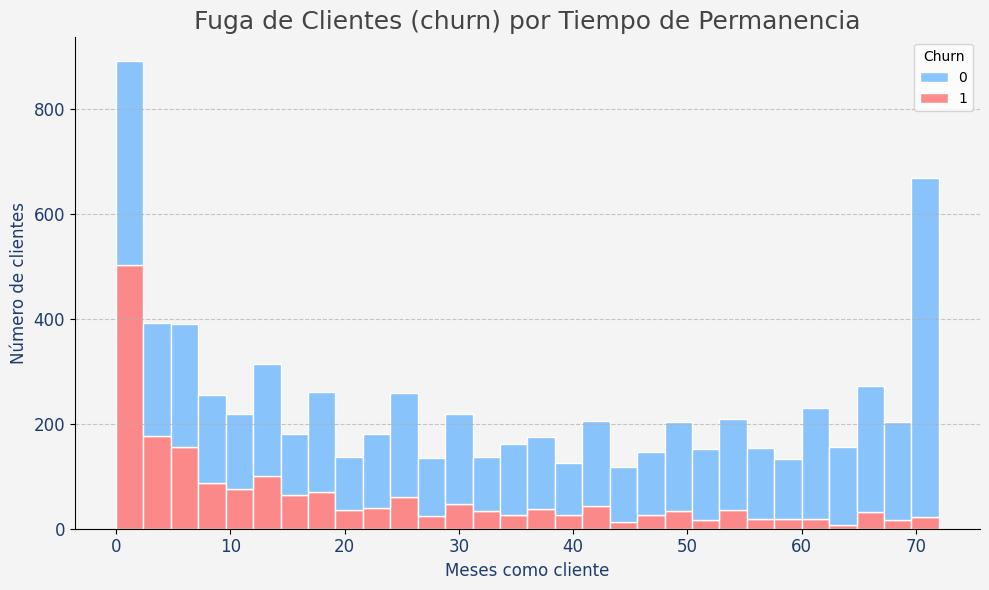

In [18]:
plot_estado_por_tiempo_permanencia().show()


#4.0 visualizacion de estado de clientes vs genero de los clientes

In [19]:
def plot_churn_por_genero():
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Crear tabla de contingencia: conteo de clientes por género y churn
    genero_churn = df.groupby(['customer_gender', 'Churn'], observed=True)['customerID'].count().unstack().fillna(0)

    # Convertir a proporciones para mejor comparación visual
    genero_churn_prop = genero_churn.div(genero_churn.sum(axis=1), axis=0)

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(8, 6))

    # Crear gráfico de barras apiladas (puedes cambiar stacked=False para barras agrupadas)
    genero_churn_prop.plot(kind='bar', stacked=True, ax=ax, color=['#66b3ff', '#ff6666'])

    # Personalización
    ax.set_title('Proporción de Churn por Género', fontsize=16, color='#333333')
    ax.set_xlabel('Género del Cliente', fontsize=12)
    ax.set_ylabel('Proporción de Clientes', fontsize=12)
    ax.legend(['Activo', 'Dado de Baja'], title='Estado del Cliente')
    ax.set_facecolor('#F4F4F4')
    fig.set_facecolor('#F4F4F4')
    sns.despine()
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Ajuste final
    plt.tight_layout()
    return plt


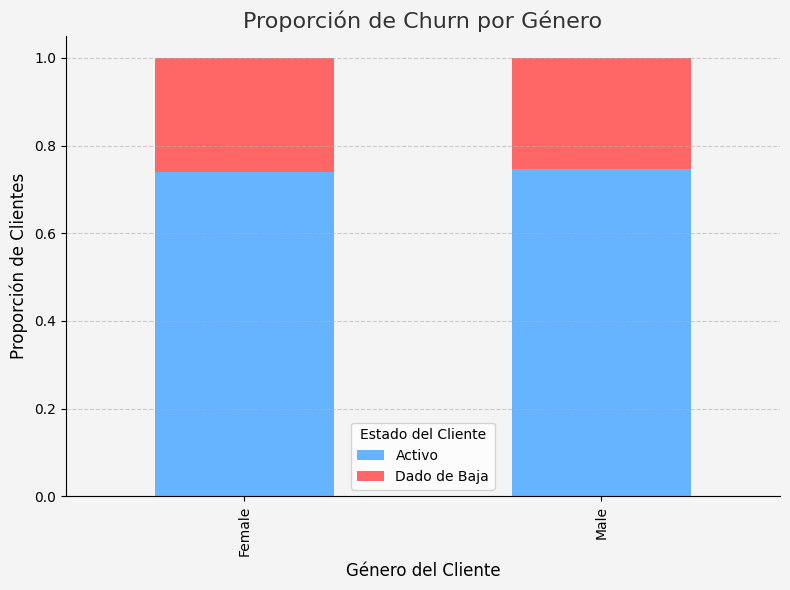

In [20]:
plot_churn_por_genero().show()

#5.0 visualizacion estado cliente vs Condicion de Senior ( > 65 años)

In [21]:

def plot_churn_vs_senior():
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Traducir valores a etiquetas legibles
    df_plot = df.copy()
    df_plot['EdadCliente'] = df_plot['customer_SeniorCitizen'].map({0: 'No Senior', 1: 'Senior'})

    # Agrupar y calcular proporciones
    senior_churn = df_plot.groupby(['EdadCliente', 'Churn'], observed=True).size().unstack().fillna(0)
    senior_churn_prop = senior_churn.div(senior_churn.sum(axis=1), axis=0)

    # Crear gráfico de barras
    fig, ax = plt.subplots(figsize=(8, 6))
    senior_churn_prop.plot(kind='bar', stacked=False, ax=ax, color=['#66b3ff', '#ff6666'])

    # Personalizar gráfico
    ax.set_title('Fuga de Clientes rango etario', fontsize=16, color='#333333')
    ax.set_xlabel('Categoría de Edad', fontsize=12)
    ax.set_ylabel('Proporción de Clientes', fontsize=12)
    ax.legend(['Activo', 'Dado de Baja'], title='Estado de Cliente')
    ax.set_facecolor('#F4F4F4')
    fig.set_facecolor('#F4F4F4')
    sns.despine()
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    return plt


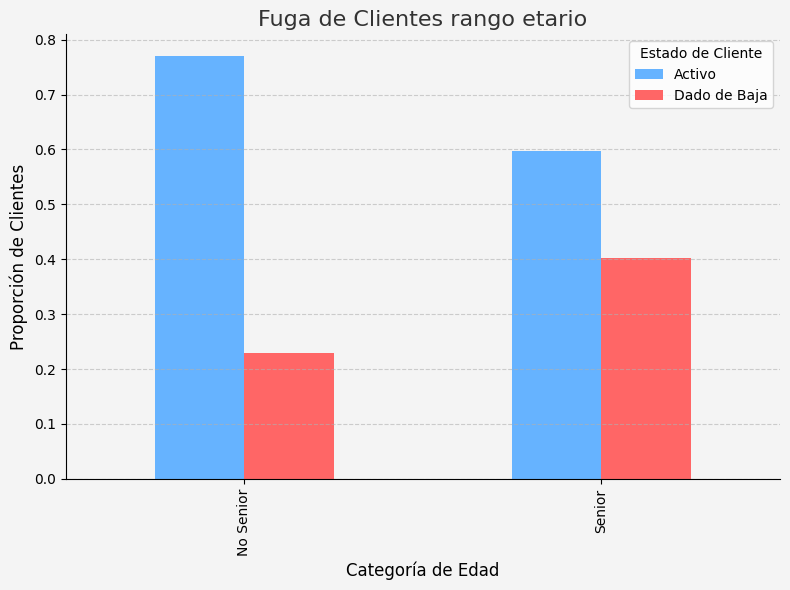

In [22]:
 plot_churn_vs_senior().show()

#6.0 Estado de clientes vs si tienen pareja

In [23]:
def plot_churn_vs_partner():
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    # Mapear los valores booleanos a texto legible
    df_plot = df.copy()
    df_plot['TienePareja'] = df_plot['customer_Partner'].map({1: 'Con Pareja', 0: 'Sin Pareja'})

    # Agrupar y calcular proporciones de churn por categoría
    partner_churn = df_plot.groupby(['TienePareja', 'Churn'], observed=True).size().unstack().fillna(0)
    partner_churn_prop = partner_churn.div(partner_churn.sum(axis=1), axis=0)

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(8, 6))
    partner_churn_prop.plot(kind='bar', stacked=False, ax=ax, color=['#66b3ff', '#ff6666'])

    # Personalizar
    ax.set_title('Fuga de Clientes según Estado de Pareja', fontsize=16, color='#333333')
    ax.set_xlabel('Estado de Pareja', fontsize=12)
    ax.set_ylabel('Proporción de Clientes', fontsize=12)
    ax.legend(['Activo', 'Dado de Baja'], title='Estado de Cliente')
    ax.set_facecolor('#F4F4F4')
    fig.set_facecolor('#F4F4F4')
    sns.despine()
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    return plt


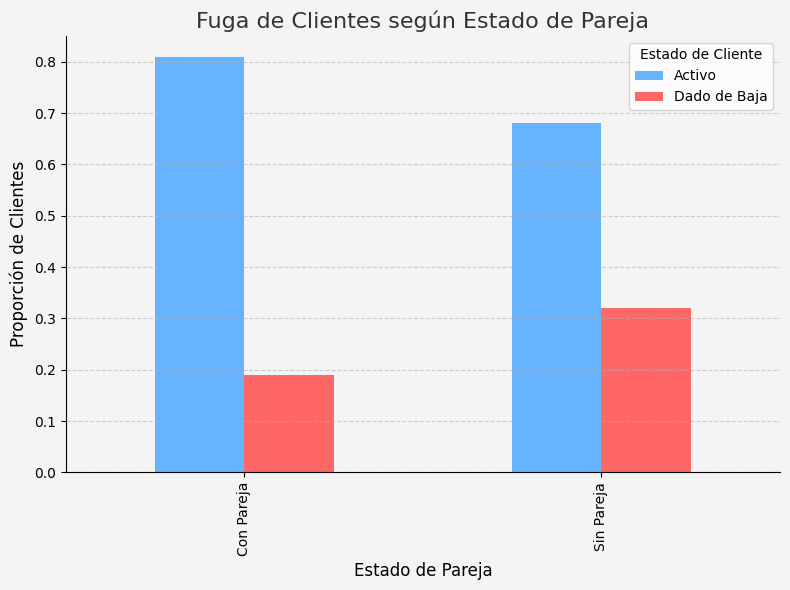

In [24]:
plot_churn_vs_partner().show()

## 7.0 Estado de cliente por servicio de internet
 Ver si el tipo de servicio de internet impacta la retención.


In [25]:
def estado_por_servicio_internet():
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    # Preparar datos
    churn_internet = df.groupby(['internet_InternetService', 'Churn'], observed=True).size().reset_index(name='count')
    total_por_servicio = churn_internet.groupby('internet_InternetService')['count'].transform('sum')
    churn_internet['porcentaje'] = churn_internet['count'] / total_por_servicio

    # Estilo Zoop
    GRIS_1 = '#F4F4F4'
    AZUL_1 = '#1f3b6f'
    ROJO_1 = '#ff6666'
    AZUL_CLARO = '#66b3ff'

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor(GRIS_1)
    ax.set_facecolor(GRIS_1)

    # Gráfico de barras agrupadas
    sns.barplot(data=churn_internet,
                x='internet_InternetService',
                y='porcentaje',
                hue='Churn',
                palette={False: AZUL_CLARO, True: ROJO_1},
                ax=ax)

    # Título y etiquetas
    ax.set_title('Estado Cliente por Tipo de Servicio de Internet', fontsize=18, color=AZUL_1)
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel('Proporción de Clientes', fontsize=12, color=AZUL_1)
    ax.tick_params(axis='x', labelsize=12, labelcolor=AZUL_1)
    ax.tick_params(axis='y', labelsize=12, labelcolor=AZUL_1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Leyenda
    ax.legend(title='Estado de Cliente', labels=['No', 'Sí'])

    # Eliminar bordes
    sns.despine(left=True, bottom=True)

    # Ajustar y retornar
    plt.tight_layout()
    return plt


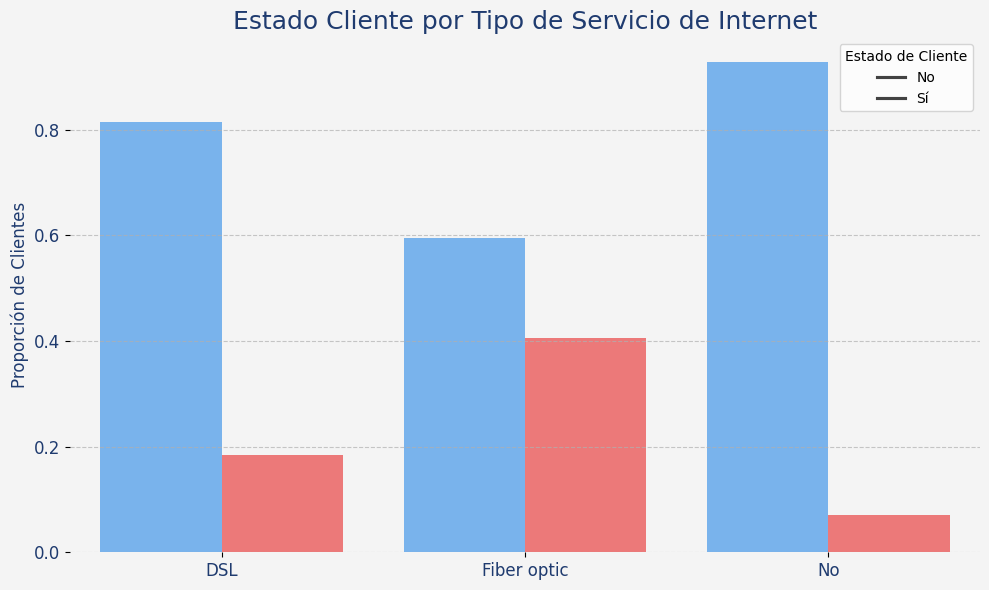

In [26]:
estado_por_servicio_internet().show()

## 8.0 Estado de cliente  por cargos mensuales
saber si los clientes que pagan más se van más.

In [27]:

def boxplot_churn_vs_monthly_charges():
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    # Validación básica

    GRIS_1 = '#F4F4F4'
    AZUL_1 = '#1f3b6f'
    ROJO_1 = '#ff6666'
    AZUL_CLARO = '#66b3ff'

    if 'Churn' not in df.columns or 'account_Charges_Monthly' not in df.columns:
        raise ValueError("El DataFrame debe contener las columnas 'Churn' y 'account_Charges_Monthly'.")

    # Asegurar que Churn es categórico (para evitar errores con la paleta)
    df['Churn'] = df['Churn'].astype('category')

    # Crear figura
    plt.figure(figsize=(10, 6))

    # Crear el boxplot
    sns.boxplot(
        x='Churn',
        y='account_Charges_Monthly',
        data=df,
        hue='Churn',
        palette={0: AZUL_CLARO, 1: ROJO_1},
        dodge=False,
        legend=False  # elimina leyenda duplicada si no la necesitas
    )

    # Títulos y estilo
    plt.title("Distribución de Cargos Mensuales por Estado de Churn", fontsize=16, color='#4A4A4A')
    plt.xlabel("Churn (0 = No, 1 = Sí)", fontsize=12)
    plt.ylabel("Cargos Mensuales", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    return plt

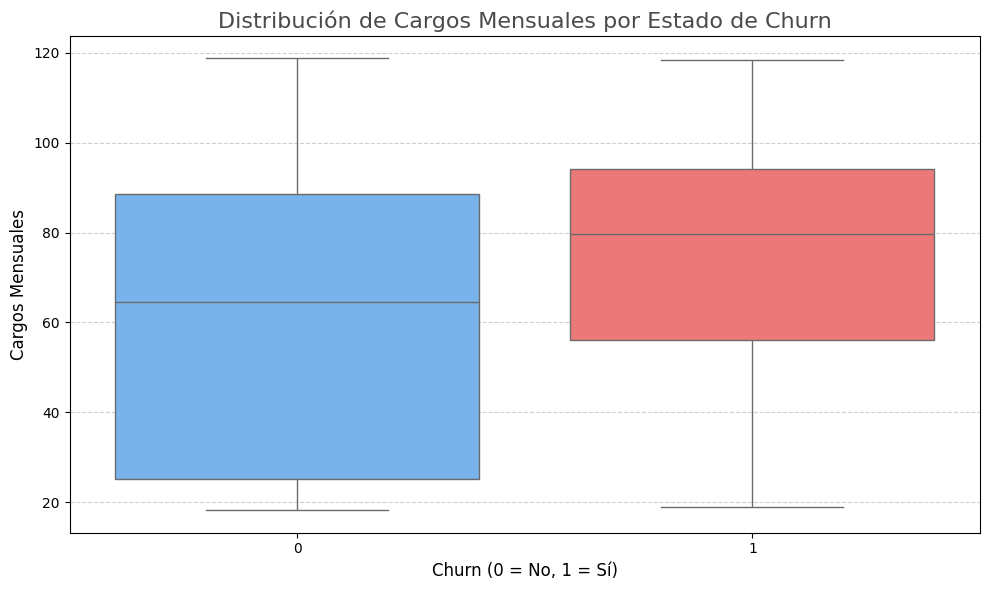

In [28]:
boxplot_churn_vs_monthly_charges().show()

##9.0 Mapa de calor de correlaciones
Observar variables cuantitativas que se correlacionan con Estado cliente.


In [29]:
def heatmap_correlaciones():
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    # Paleta y fondo estilo Zoop
    GRIS_1 = '#F4F4F4'
    GRIS_5 = '#4A4A4A'
    AZUL_1 = '#1f3b6f'

    # Selección de variables numéricas + 'Churn'
    df_num = df.select_dtypes(include=['int64', 'float64', 'bool'])
    df_num['Churn'] = df['Churn'].astype(int)  # asegurar que sea numérico

    # Calcular matriz de correlación
    corr = df_num.corr()

    # Crear figura
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor(GRIS_1)
    ax.set_facecolor(GRIS_1)

    # Mapa de calor
    sns.heatmap(
        corr,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        linewidths=0.5,
        linecolor='white',
        ax=ax,
        cbar=True,
        annot_kws={"size": 10}
    )

    # Título
    ax.set_title('Mapa de Calor de Correlaciones con Churn', fontsize=18, color=GRIS_5)

    # Estética de etiquetas
    ax.tick_params(axis='both', labelsize=10, colors=AZUL_1)

    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()

    return plt


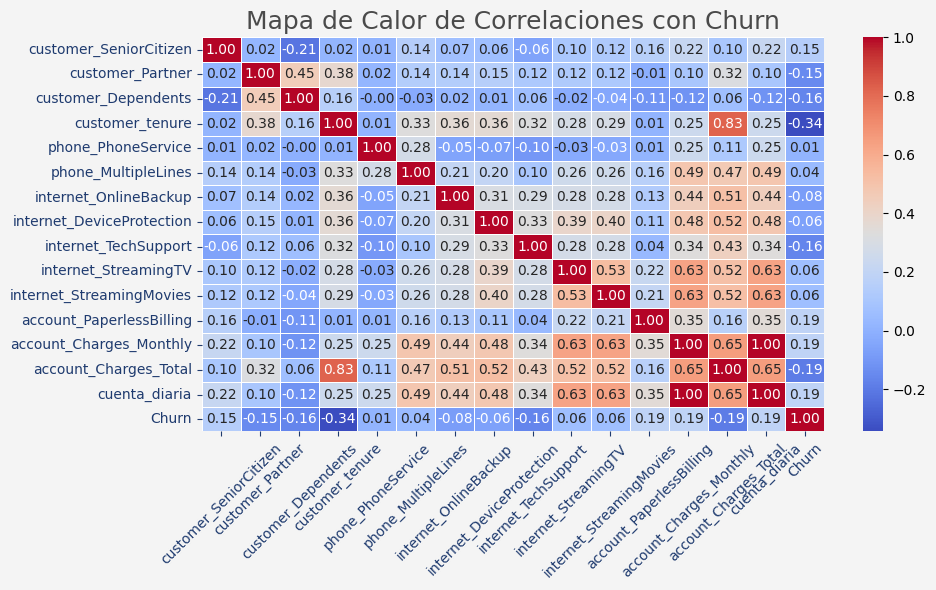

In [30]:
heatmap_correlaciones().show()

##10.0 Churn por métodos de pago (account_PaymentMethod)
Algunos métodos de pago suelen estar asociados con más clientes de Baja.


In [31]:

def churn_por_metodo_pago():
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Configurar el estilo de los gráficos
    sns.set(style="whitegrid")

    # Agrupar los datos con observed=True para evitar FutureWarning
    pago_churn = df.groupby(['account_PaymentMethod', 'Churn'], observed=True).size().unstack()

    # Calcular proporciones
    pago_churn_prop = pago_churn.div(pago_churn.sum(axis=1), axis=0)

    # Crear gráfico de barras apiladas
    fig, ax = plt.subplots(figsize=(10, 6))
    pago_churn_prop.plot(kind='bar', stacked=True, ax=ax, color=['#66b3ff', '#ff6666'])  # No (0), Sí (1)

    # Títulos y etiquetas
    ax.set_title('Churn por Método de Pago', fontsize=18, color='#333333')
    ax.set_xlabel('Método de Pago', fontsize=12)
    ax.set_ylabel('Proporción de Clientes', fontsize=12)
    ax.legend(title='Churn', labels=['No', 'Sí'], loc='upper right')

    # Rotar etiquetas del eje x para mejor visibilidad
    plt.xticks(rotation=45)

    # Ajustar márgenes
    plt.tight_layout()

    return plt


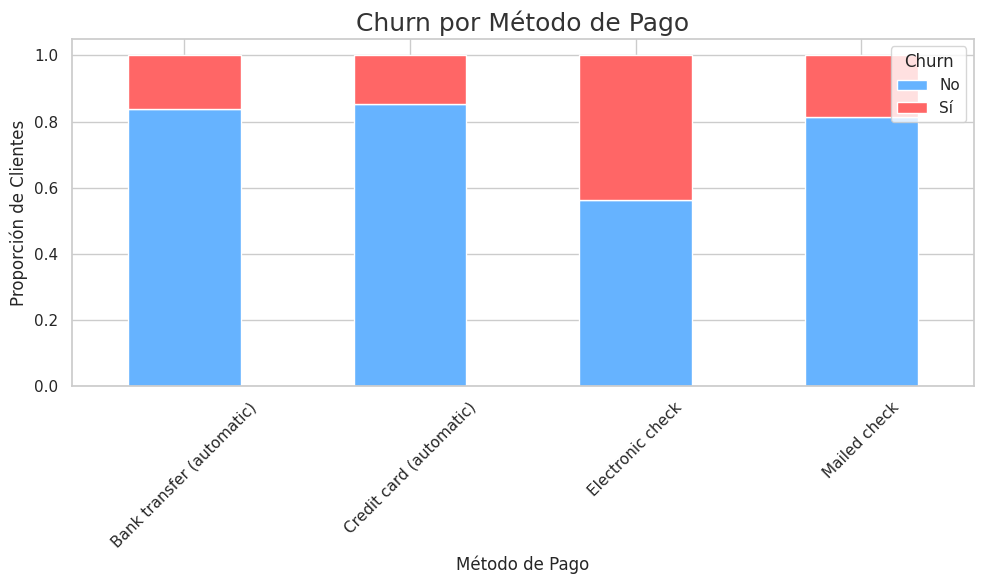

In [32]:
churn_por_metodo_pago().show()

#11.0 Generacion de archivos con graficos en formato .jpg

In [33]:
# Guardar gráficos como imágenes

def  exportar_grafico(grafico,nombre):
  imagen = grafico()
  imagen.savefig(f'{nombre}.png', bbox_inches='tight')
  imagen.close()

exportar_grafico(plot_churn_distribution,'grafico_plot_churn_distribution')
exportar_grafico(pie_churn_distribution,'grafico_pie_churn_distribution')
exportar_grafico(plot_contrato_estado_cliente,'grafico_plot_contrato_estado_cliente')

exportar_grafico(plot_churn_por_genero,'grafico_plot_churn_por_genero')
exportar_grafico(plot_churn_vs_senior,'grafico_plot_churn_vs_senior')


exportar_grafico(estado_por_servicio_internet,'grafico_estado_por_servicio_internet')
exportar_grafico(boxplot_churn_vs_monthly_charges,'grafico_boxplot_churn_vs_monthly_charges')
exportar_grafico(heatmap_correlaciones,'grafico_heatmap_correlaciones')
exportar_grafico(churn_por_metodo_pago,'grafico_churn_por_metodo_pago')

<Figure size 800x600 with 0 Axes>

#12.0 ¡Extra! Análisis de correlación entre variables

## 12.1 Preparacion de DataFrame a numericos

In [36]:

def  preparar_datos_para_correlacion(df):
    import pandas as pd
    df_corr = df.copy()

    # Convertir columna booleana a numérica
    df_corr['Churn'] = df_corr['Churn'].astype(int)

    # Campos booleanos a 1/0
    bool_cols = df_corr.select_dtypes(include='bool').columns
    df_corr[bool_cols] = df_corr[bool_cols].astype(int)

    # Filtrar solo variables numéricas
    df_num = df_corr.select_dtypes(include=['int64', 'float64'])
    return df_num

##12.2 Matriz de correlación con Churn

In [39]:
def plot_matriz_correlacion(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    df_num = preparar_datos_para_correlacion(df)

    # Calcular correlaciones
    corr = df_num.corr()

    # Graficar
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True)
    plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
    plt.tight_layout()
    return plt


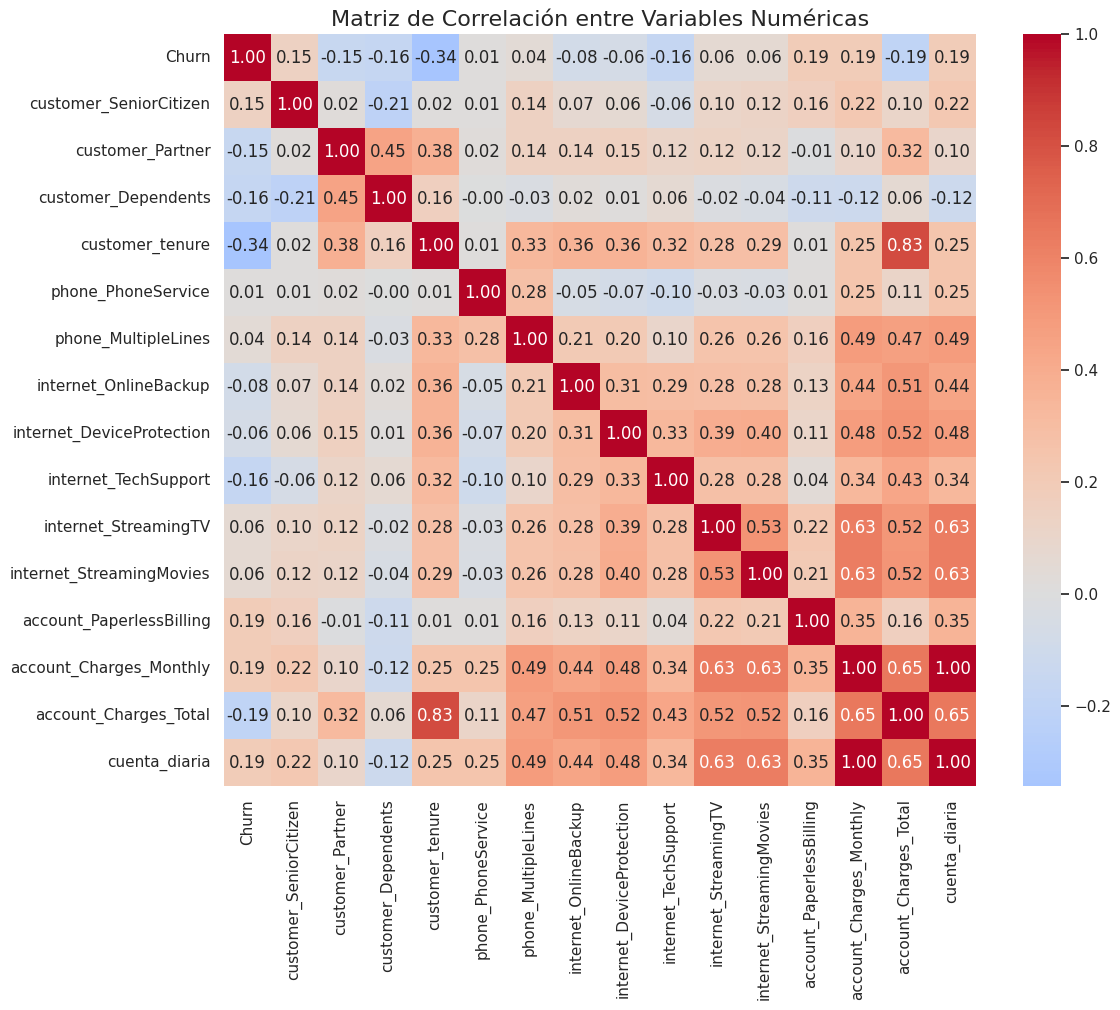

In [40]:
plot_matriz_correlacion(df).show()

##12.3 Análisis: Número de servicios vs Churn

In [52]:
def plot_servicios_vs_churn():
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    df_servicios = df_num.copy()

    # Seleccionar columnas de servicios (booleans relacionados a productos)
    servicio_cols = [
        'phone_PhoneService', 'phone_MultipleLines',
         'internet_OnlineBackup',
        'internet_DeviceProtection', 'internet_TechSupport',
        'internet_StreamingTV', 'internet_StreamingMovies'
    ]

    # Convertir booleanos a numérico y sumar
    df_servicios[servicio_cols] = df_servicios[servicio_cols].astype(int)
    df_servicios['num_servicios'] = df_servicios[servicio_cols].sum(axis=1)
    df_servicios['Churn'] = df_servicios['Churn'].astype(int)

    # Gráfico
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        x='Churn',
        y='num_servicios',
        data=df_servicios,
        hue='Churn',  # Añadido para evitar el warning
        palette={0: '#66b3ff', 1: '#ff6666'},
        legend=False  # Para que no duplique la leyenda
    )


    plt.title('Número de Servicios vs Fuga de Clientes', fontsize=14)
    plt.xlabel('Churn (0 = Activo, 1 = Baja)', fontsize=12)
    plt.ylabel('Número de Servicios Contratados', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    sns.despine()
    plt.tight_layout()
    return plt


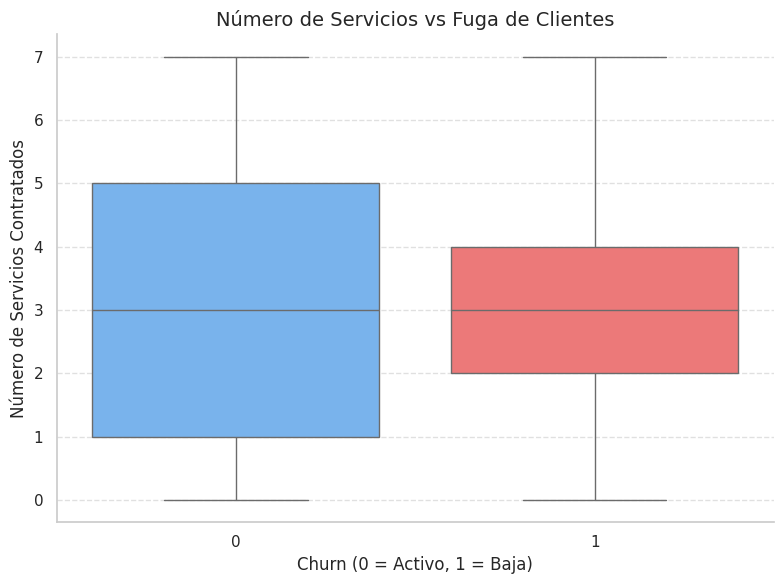

In [53]:
plot_servicios_vs_churn().show()

#📄Informe final

#Informe de Análisis de Fuga de Clientes para Telecomx

##🔹 Introducción

Telecomx, una empresa de servicios de internet, telefonía y cable, enfrenta un problema crítico de fuga de clientes (churn). Comprender las causas detrás del abandono de clientes es vital para garantizar la sostenibilidad y crecimiento de la compañía. El objetivo principal de este análisis es identificar patrones y factores clave asociados a la fuga e clientes, a fin de construir modelos predictivos y estrategias que ayuden a reducir la tasa de cancelación de clientes.

##🔹 Limpieza y Tratamiento de Datos

El archivo proporcionado en formato JSON fue procesado en python usando la libreria pandas generando un Dataframe  que contiene 7267 registros y 21 columnas. Las variables están agrupadas por categorías como datos del cliente, servicios contratados y comportamiento de pago. Las principales acciones de limpieza incluyeron:

Conversión de valores booleanos y categóricos en formatos legibles.

Identificación y manejo de valores nulos en account_Charges_Total.

Revisión de la coherencia de los tipos de datos (por ejemplo, customer_tenure como entero).


##🔹 Análisis Exploratorio de Datos (EDA)

###1. Distribución de Churn

Un gráfico de dona mostró que un 27.5% de los clientes abandonaron el servicio, lo que representa una preocupación significativa para el negocio.

###2. Fuga de Clientes por Tipo de Contrato

Se genera el cruze entre fuga de clientes y los tipos de contrato de los clientes en esta grafica se visualiza:
Clientes con contrato Month-to-month tienen una tasa de churn mucho más alta que aquellos con contratos de uno o dos años. Esto sugiere que la duración del contrato está estrechamente ligada a la retención.

###3. Fuga de clientes por Tiempo de Permanencia (Tenure)

Se genera el cruze entre fuga de clientes y el tiempo de permanencia de los Clientes.  En esta grafica se visualiza:
la fuga de clientes  es significativamente mayor entre nuevos clientes (menos de 10 meses), indicando una ventana crítica de retención en los primeros meses del servicio.


###4. Fuga de Clientes por Genero del cliente

Se genera el cruze entre fuga de clientes y el genero(sexo) del cliente. En esta grafica se visualiza:
que no existen diferencia entre Hombre y mujeres respecto al fugarse o mantenerse como cliente

###5. Estado de Cliente por condicion Senior

Se genera el cruze entre estado de clientes y condicion Senior. En esta grafica se visualiza:
Clientes del tipo Senior se han fugado mas que los que no cumplen esta condicion

###6. Estado de Cliente por de pareja

Se genera el cruze entre estado de clientes y condicion de pareja ( vivir acompañado). En esta grafica se visualiza:
Clientes que viven solo dan mas de baja el servicio que los clientes que viven acompañados.


###7. Fuga de Clientes por Servicio de Internet

Se genera el cruze entre fuga de clientes y el tipo de conexion a internet. En esta grafica se visualiza:
Clientes con servicio de internet por fibra óptica presentaron mayor fuga que aquellos sin internet o con DSL, lo que podría reflejar problemas con la calidad o expectativas del servicio.

###8. Fuga de Clientes vs Cargos Mensuales

Se genera el cruze entre fuga de clientes y el monto de cargo mensual. En esta grafica se visualiza:
Los clientes que abandonan tienden a tener cargos mensuales más altos, lo que fue evidenciado mediante un boxplot. Esto puede relacionarse con la percepción de valor del servicio.

###9. Mapa de Calor de Correlaciones

Se encontró una correlación positiva entre fuga de clientes(churn) y variables como account_Charges_Monthly y internet_Fiber_optic, mientras que el customer_tenure se correlaciona negativamente con churn.
Valores negativos fuertes en la matriz indican protección contra la fuga, mientras que valores positivos sugieren riesgo.

###10. Fuga de Clientes por Método de Pago

Se genera el cruze entre fuga de clientes y el medio de pago utizado por los clientes. En esta grafica se visualiza:
El método Electronic Check está asociado a una mayor tasa de fuga de clientes, posiblemente porque estos clientes son menos comprometidos o tienen mayor facilidad para cancelar.

###11. Fuga de Clientes por Cantidad de Servicios contratados

Se genera el cruze entre fuga de clientes y contidad de servicios contratados . En esta grafica se visualiza:

Clientes con menos servicios contratados tienen mayor tasa de fuga,

##🔹 Conclusiones e Insights

Los contratos de corto plazo (mensuales) presentan mucho mayor fuga de clientes ( o clientes dados de baja).

Los primeros meses de un cliente son críticos para la retención.

Clientes con cargos más altos abandonan más, lo que puede reflejar una mala relación costo-beneficio percibida.

Clientes con menos servicios contratados podrían tener mayor tasa de evasión, lo que sugiere que promover servicios adicionales podría mejorar la retención.

Valores negativos fuertes en la matriz correlacion  indican protección contra la fuga, mientras que valores positivos sugieren riesgo.

los clientes de la categoria senior ( mayores de 65 años) se fugan en mayor cantidad de los que no cumplen esta condicion.

El tipo de servicio de internet y el método de pago son factores clave asociados con la fuga.

##🔹 Recomendaciones

Fomentar contratos a largo plazo con beneficios exclusivos (descuentos, equipos gratuitos).

Programas de onboarding para nuevos clientes que mejoren su experiencia en los primeros meses.
Analizar por que los clientes Senior no estan permaneciendo  y los que no tienen pareja se estan fugando.

Monitorear proactivamente clientes con altos cargos mensuales y ofrecer paquetes personalizados.

Evaluar la experiencia del cliente con fibra óptica, buscando mejoras en calidad o soporte.

Incentivar métodos de pago automáticos o más estables, como tarjetas de crédito, para mejorar la retención.

Este análisis sienta las bases para el desarrollo de un modelo predictivo de la fuga de clientes (churn) , el cual podrá guiar intervenciones específicas y reducir de forma significativa la pérdida de clientes.


Este análisis fue desarrollado en Python usando las bibliotecas  Pandas, Matplotlib y Seaborn para respaldar los hallazgos y facilitar su interpretación.

